In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('final_data.csv')
df.drop(columns = ['player', 'team', 'name'], inplace = True)
df.dropna(inplace = True)
df.shape

(10754, 19)

array([[<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'appearance'}>,
        <Axes: title={'center': 'goals'}>],
       [<Axes: title={'center': 'assists'}>,
        <Axes: title={'center': 'yellow cards'}>,
        <Axes: title={'center': 'second yellow cards'}>,
        <Axes: title={'center': 'red cards'}>],
       [<Axes: title={'center': 'goals conceded'}>,
        <Axes: title={'center': 'clean sheets'}>,
        <Axes: title={'center': 'minutes played'}>,
        <Axes: title={'center': 'days_injured'}>],
       [<Axes: title={'center': 'games_injured'}>,
        <Axes: title={'center': 'award'}>,
        <Axes: title={'center': 'current_value'}>,
        <Axes: title={'center': 'highest_value'}>],
       [<Axes: title={'center': 'position_encoded'}>,
        <Axes: title={'center': 'winger'}>, <Axes: >, <Axes: >]],
      dtype=object)

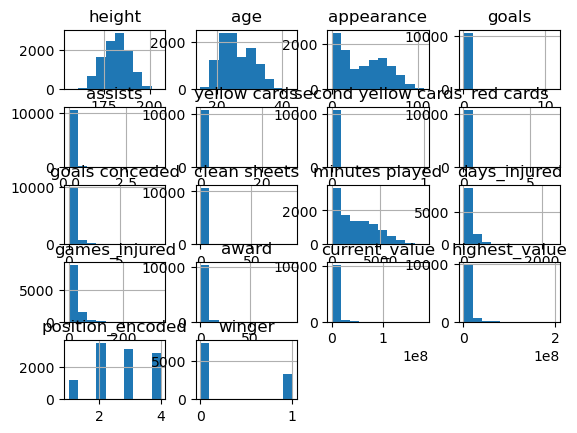

In [4]:
df.hist()

In [5]:
df.columns 

Index(['position', 'height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value', 'position_encoded',
       'winger'],
      dtype='object')

In [6]:
df.dtypes

position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [7]:
low_threshold = df['current_value'].quantile(0.35)
mid_threshold = df['current_value'].quantile(0.75)


def categorize_price(value):
    if value < low_threshold:
        return 'cheap price'
    elif value < mid_threshold:
        return 'regular'
    else:
        return 'expensive'

df['price_category'] = df['current_value'].apply(categorize_price)

In [8]:
from sklearn.preprocessing import LabelEncoder

X = df.drop(['current_value', 'price_category'], axis=1)
y = df['price_category']

X_encoded = pd.get_dummies(X, drop_first=True)


In [9]:
X_encoded.dtypes

height                                 float64
age                                    float64
appearance                               int64
goals                                  float64
assists                                float64
yellow cards                           float64
second yellow cards                    float64
red cards                              float64
goals conceded                         float64
clean sheets                           float64
minutes played                           int64
days_injured                             int64
games_injured                            int64
award                                    int64
highest_value                            int64
position_encoded                         int64
winger                                   int64
position_Attack Centre-Forward            bool
position_Attack-LeftWinger                bool
position_Attack-RightWinger               bool
position_Attack-SecondStriker             bool
position_Defe

In [10]:

numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
one_hot_cols = X.select_dtypes(exclude=['float64', 'int64']).columns

scaler = StandardScaler()
X_scaled_numerical = pd.DataFrame(scaler.fit_transform(X[numerical_cols]), columns=numerical_cols)

X_scaled = pd.concat([X_scaled_numerical, X[one_hot_cols].reset_index(drop=True)], axis=1)


In [12]:
# Check for any non-numerical columns
non_numeric_cols = X_scaled.select_dtypes(exclude=['float64', 'int64']).columns

if len(non_numeric_cols) > 0:
    print(f"Non-numeric columns found: {non_numeric_cols.tolist()}")
    # You can one-hot encode these columns or handle them appropriately
    X_scaled = pd.get_dummies(X_scaled, columns=non_numeric_cols)


Non-numeric columns found: ['position']


In [15]:
from sklearn.metrics import classification_report

# Assuming X_scaled is your preprocessed DataFrame and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the SVC model
svc = SVC()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1],
    'gamma': [1, 0.1],
    'kernel': ['linear', 'rbf'],
}

# Set up GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Output the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Predict on the test set
y_pred = grid_search.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   5.6s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   5.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   5.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   5.4s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   5.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  10.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   9.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  10.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  10.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   9.8s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   5.0s
[CV] END ....................C=0.1, gamma=0.1, ke